# Katrina Johnson 
18 April 2019 
Unit 3.2.6 Challenge 

## Challenge: If a tree falls in the forest...

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
%matplotlib inline 



In [424]:
df = pd.read_csv('supplier_compliance.csv')

In [425]:
df

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,28%,28%,No,13.1%,18.0%,13.1%,14.9%,C,16.8%,20.5%,148.5,"14,120"
1,Yucaipa Valley Water District,South Coast,34%,20%,Yes,18.3%,7.1%,7.1%,12.9%,NaN,26.4%,11.9%,260.0,"45,018"
2,Sanger City of,Tulare Lake,26%,26%,No,17.3%,12.4%,17.3%,8.7%,NaN,38.0%,17.2%,181.1,"25,664"
3,Adelanto City of,South Lahontan,16%,16%,No,9.3%,-10.3%,9.3%,6.7%,C,20.5%,-30.6%,125.5,"29,023"
4,Red Bluff City of,Sacramento River,33%,33%,No,27.8%,19.5%,27.8%,5.2%,NaN,42.4%,30.8%,202.9,"14,076"
5,Bellflower-Somerset Mutual Water Company,South Coast,20%,20%,Yes,18.3%,16.4%,16.4%,3.6%,NaN,19.2%,14.1%,87.7,"46,300"
6,Bakman Water Company,Tulare Lake,34%,34%,No,30.7%,34.3%,30.7%,3.3%,NaN,36.1%,35.9%,192.5,"16,756"
7,North Marin Water District,San Francisco Bay,24%,0%,Yes,22.7%,-2.9%,-2.9%,2.9%,NaN,34.7%,12.9%,135.3,"61,299"
8,San Lorenzo Valley Water District,Central Coast,12%,18%,Yes,22.5%,15.1%,15.1%,2.9%,NaN,23.9%,12.9%,109.5,"19,000"
9,Fillmore City of,South Coast,26%,26%,No,23.4%,22.6%,23.4%,2.6%,NaN,22.6%,20.1%,137.7,"15,222"


df.set_index('Supplier Name', drop=True,inplace=True)

In [426]:
df.columns

Index(['Supplier Name', ' Hydrologic Region',
       ' State-mandated Conservation Standard - Previous (3/1/2016)',
       ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       ' Did Supplier Self-certify?',
       ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       ' June 2016 to Aug 2016 Self-certified?',
       ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
       ' Missed Conservation Standard By', ' Order Status',
       ' Monthly Savings (as compared to 2013) - Aug 2015',
       ' Monthly Savings (as compared to 2013) - Aug 2016',
       ' Estimated Aug 2016 Monthly R-GPCD', ' Total Population Served'],
      dtype='object')

In [427]:
df.describe()

,Estimated Aug 2016 Monthly R-GPCD
count,389.000000
mean,133.831877
std,68.239474
min,35.400000
25%,87.000000
50%,118.300000
75%,164.500000
max,524.600000


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 14 columns):
Supplier Name                                                                         389 non-null object
 Hydrologic Region                                                                    389 non-null object
 State-mandated Conservation Standard - Previous (3/1/2016)                           389 non-null object
 State-mandated Conservation Standard - Current (Effective 6/1/2016)                  389 non-null object
 Did Supplier Self-certify?                                                           389 non-null object
 Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    389 non-null object
 June 2016 to Aug 2016 Self-certified?                                                389 non-null object
 Applicable Cumulative Savings by Supplier (as compared to 2013)                      389 non-null object
 Missed Conservation Standard By               

In [429]:
df.count()

Supplier Name                                                                         389
 Hydrologic Region                                                                    389
 State-mandated Conservation Standard - Previous (3/1/2016)                           389
 State-mandated Conservation Standard - Current (Effective 6/1/2016)                  389
 Did Supplier Self-certify?                                                           389
 Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    389
 June 2016 to Aug 2016 Self-certified?                                                389
 Applicable Cumulative Savings by Supplier (as compared to 2013)                      389
 Missed Conservation Standard By                                                      389
 Order Status                                                                           7
 Monthly Savings (as compared to 2013) - Aug 2015                                     389
 Monthly S

In [430]:
df.min()

Supplier Name                                                                         Adelanto City of
 Hydrologic Region                                                                       Central Coast
 State-mandated Conservation Standard - Previous (3/1/2016)                                        10%
 State-mandated Conservation Standard - Current (Effective 6/1/2016)                                0%
 Did Supplier Self-certify?                                                                         No
 Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016               10.9%
 June 2016 to Aug 2016 Self-certified?                                                           -0.8%
 Applicable Cumulative Savings by Supplier (as compared to 2013)                                 -0.8%
 Missed Conservation Standard By                                                                 -0.4%
 Monthly Savings (as compared to 2013) - Aug 2015                        

In [431]:
df[' Estimated Aug 2016 Monthly R-GPCD'].idxmin()

376

In [432]:
df.iloc[[367]]

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
367,San Jacinto City of,South Coast,30%,0%,Yes,30.2%,29.7%,29.7%,-29.7%,NaN,28.8%,29.5%,108.5,"17,961"


In [433]:
df[' Estimated Aug 2016 Monthly R-GPCD'].idxmax()

169

In [434]:
df.iloc[[169]]

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
169,Santa Fe Irrigation District,South Coast,28%,0%,Yes,28.3%,17.6%,17.6%,-17.6%,NaN,36.6%,14.0%,524.6,"19,839"


In [435]:
df[' Estimated Aug 2016 Monthly R-GPCD'].mean()

133.8318766066838

In [436]:
df[' Estimated Aug 2016 Monthly R-GPCD'].std()

68.23947380649115

In [437]:
#Step 1. Univariate Exploration of selected features
#Features:
#1a. ' Missed Conservation Standard By'

#1b. ' Monthly Savings (as compared to 2013) - Aug 2016'

#1c. ' Did Supplier Self-certify?'

#1d. ' Total Population Served'

#Step 1. Univariate Exploration of selected features
#Features:
#1a. ' Missed Conservation Standard By'

#num_boy_births = births_df.loc[(births_df['Gender'] == 'Boys') & (births_df['Year'] == 2017), 'Number']
#sns.distplot(num_boy_births, kde=False, rug=False);
#plt.show()


x = df[' Estimated Aug 2016 Monthly R-GPCD']
plt.hist(x, color='green', alpha=0.5)
plt.show()

#Mike suggests using .as_type() to convert a percent to a ratio
#the -1 in the lamdba function causes the loop to strip the last character of the back of the string,which is the percent sign.
#Next, the .astype() method turns all of the strings into floats
#Then, it turns them into percentages by dividing them by 100
#Here is the example, to do this to a series do the following:

df[' Missed Conservation Standard By'] = df[' Missed Conservation Standard By'].apply(lambda x: x[:-1]).astype(float)/100

In [438]:
df[' Total Population Served']

0       14,120
1       45,018
2       25,664
3       29,023
4       14,076
5       46,300
6       16,756
7       61,299
8       19,000
9       15,222
10         602
11      18,392
12      37,168
13      29,500
14      39,002
15       8,923
16      51,463
17      12,032
18      43,328
19      72,050
20      16,654
21      10,668
22      62,183
23     109,139
24     223,432
25      10,572
26      33,300
27      13,348
28      81,963
29     113,478
        ...   
359     20,352
360     62,602
361    199,680
362      3,257
363     14,915
364     31,872
365     58,784
366     58,942
367     17,961
368     10,022
369     74,850
370     24,657
371      7,107
372     25,608
373     82,794
374     10,850
375    104,594
376     15,119
377    271,817
378      3,233
379     26,032
380     83,400
381     22,590
382     39,000
383     25,194
384     28,086
385      3,406
386      9,546
387     16,066
388     19,495
Name:  Total Population Served, Length: 389, dtype: object

In [439]:
#This code works for replacing one string character with a blank, or another string character


df[' Total Population Served'] = df[' Total Population Served'].str.replace(',', '')
#df[' Total Population Served'] 

0       14120
1       45018
2       25664
3       29023
4       14076
5       46300
6       16756
7       61299
8       19000
9       15222
10        602
11      18392
12      37168
13      29500
14      39002
15       8923
16      51463
17      12032
18      43328
19      72050
20      16654
21      10668
22      62183
23     109139
24     223432
25      10572
26      33300
27      13348
28      81963
29     113478
        ...  
359     20352
360     62602
361    199680
362      3257
363     14915
364     31872
365     58784
366     58942
367     17961
368     10022
369     74850
370     24657
371      7107
372     25608
373     82794
374     10850
375    104594
376     15119
377    271817
378      3233
379     26032
380     83400
381     22590
382     39000
383     25194
384     28086
385      3406
386      9546
387     16066
388     19495
Name:  Total Population Served, Length: 389, dtype: object

In [440]:
df[' Total Population Served'] = df[' Total Population Served'].astype(float)
#df[' Total Population Served']

0       14120.0
1       45018.0
2       25664.0
3       29023.0
4       14076.0
5       46300.0
6       16756.0
7       61299.0
8       19000.0
9       15222.0
10        602.0
11      18392.0
12      37168.0
13      29500.0
14      39002.0
15       8923.0
16      51463.0
17      12032.0
18      43328.0
19      72050.0
20      16654.0
21      10668.0
22      62183.0
23     109139.0
24     223432.0
25      10572.0
26      33300.0
27      13348.0
28      81963.0
29     113478.0
         ...   
359     20352.0
360     62602.0
361    199680.0
362      3257.0
363     14915.0
364     31872.0
365     58784.0
366     58942.0
367     17961.0
368     10022.0
369     74850.0
370     24657.0
371      7107.0
372     25608.0
373     82794.0
374     10850.0
375    104594.0
376     15119.0
377    271817.0
378      3233.0
379     26032.0
380     83400.0
381     22590.0
382     39000.0
383     25194.0
384     28086.0
385      3406.0
386      9546.0
387     16066.0
388     19495.0
Name:  Total Population 

In [441]:
#Convert all strings to ints, leave out percent signs, convert percent values into ratios, for a whole dataframe

cols = [
       ' State-mandated Conservation Standard - Previous (3/1/2016)',
       ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       ' June 2016 to Aug 2016 Self-certified?',
       ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
       ' Missed Conservation Standard By', 
       ' Monthly Savings (as compared to 2013) - Aug 2015',
       ' Monthly Savings (as compared to 2013) - Aug 2016',
       ]

#This code works for replacing one string character with a blank, or another string character
#df[cols] = df[cols].replace({'\%' : '', }, regex=True)


#Note .apply() is a method that is works on each column in a dataframe, one at a time.  
#Because apply works on one column at a time,we can find the mean of each column one by one, and fill any empty space
#with the mean of the column, then go to the next column and do the same thing.

#The following code works for dataframes that need to have strings changed to ints, and percent symbols changed to actual
#int ratios.  pd.df.apply() goes through each cell/element in a dataframe and applies the specified operations and changes to each one individually, 
#not as an operation performed on a column/series. Note: cols in df[cols] is not a string, it is the name of a variable,
#so it does not need quotes.

df[cols] = df[cols].applymap(lambda x: x[:-1]).astype(float)/100

df

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,0.28,0.28,No,0.131,0.180,0.131,0.149,C,0.168,0.205,148.5,14120.0
1,Yucaipa Valley Water District,South Coast,0.34,0.20,Yes,0.183,0.071,0.071,0.129,NaN,0.264,0.119,260.0,45018.0
2,Sanger City of,Tulare Lake,0.26,0.26,No,0.173,0.124,0.173,0.087,NaN,0.380,0.172,181.1,25664.0
3,Adelanto City of,South Lahontan,0.16,0.16,No,0.093,-0.103,0.093,0.067,C,0.205,-0.306,125.5,29023.0
4,Red Bluff City of,Sacramento River,0.33,0.33,No,0.278,0.195,0.278,0.052,NaN,0.424,0.308,202.9,14076.0
5,Bellflower-Somerset Mutual Water Company,South Coast,0.20,0.20,Yes,0.183,0.164,0.164,0.036,NaN,0.192,0.141,87.7,46300.0
6,Bakman Water Company,Tulare Lake,0.34,0.34,No,0.307,0.343,0.307,0.033,NaN,0.361,0.359,192.5,16756.0
7,North Marin Water District,San Francisco Bay,0.24,0.00,Yes,0.227,-0.029,-0.029,0.029,NaN,0.347,0.129,135.3,61299.0
8,San Lorenzo Valley Water District,Central Coast,0.12,0.18,Yes,0.225,0.151,0.151,0.029,NaN,0.239,0.129,109.5,19000.0
9,Fillmore City of,South Coast,0.26,0.26,No,0.234,0.226,0.234,0.026,NaN,0.226,0.201,137.7,15222.0


num_cols = [
       ' State-mandated Conservation Standard - Previous (3/1/2016)',
       ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       ' June 2016 to Aug 2016 Self-certified?',
       ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
       ' Missed Conservation Standard By', 
       ' Monthly Savings (as compared to 2013) - Aug 2015',
       ' Monthly Savings (as compared to 2013) - Aug 2016',
       ' Estimated Aug 2016 Monthly R-GPCD', ' Total Population Served']


pd.to_numeric(df[' State-mandated Conservation Standard - Previous (3/1/2016)'])

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


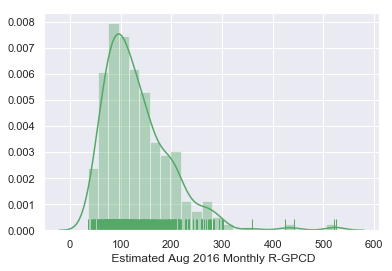

In [443]:
r_gpcd = df[' Estimated Aug 2016 Monthly R-GPCD']
sns.distplot(r_gpcd, hist=True, color='g', kde=True, rug=True);
plt.show()

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


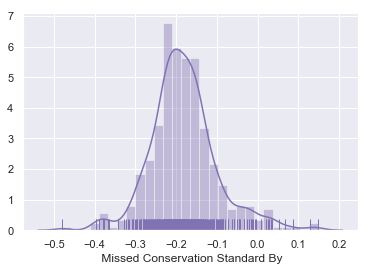

In [444]:
#def convert_to_int (missed_standard):
    #for n in missed_standard:
        #n.drop()
        #return missed_standard
missed_standard = df[' Missed Conservation Standard By']
sns.distplot(missed_standard, hist=True, color='m', kde=True, rug=True);
plt.show()

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


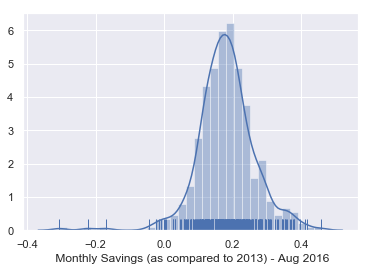

In [445]:
mthly_savings_8_2016_vs_2013 = df[' Monthly Savings (as compared to 2013) - Aug 2016']
sns.distplot(mthly_savings_8_2016_vs_2013, hist=True, kde=True, rug=True);
plt.show()

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


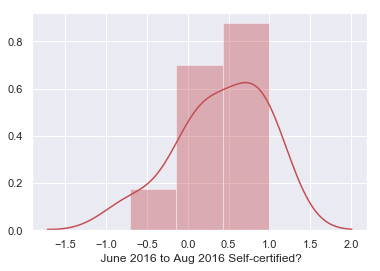

In [471]:
june_to_aug_2016_self_certified = df[' June 2016 to Aug 2016 Self-certified?']
sns.distplot(june_to_aug_2016_self_certified, color='r', );
plt.show()

/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


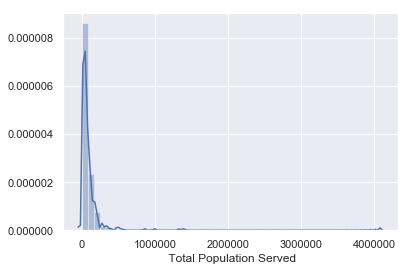

In [447]:
total_pop_served = df[' Total Population Served']
sns.distplot(total_pop_served);
plt.show()

                                                     State-mandated Conservation Standard - Previous (3/1/2016)  \
 State-mandated Conservation Standard - Previou...                                           1.000000             
 State-mandated Conservation Standard - Current...                                           0.119652             
 Enforceable Cumulative Percent Savings (as com...                                           0.487124             
 June 2016 to Aug 2016 Self-certified?                                                       0.284381             
 Applicable Cumulative Savings by Supplier (as ...                                           0.289372             
 Missed Conservation Standard By                                                            -0.156477             
 Monthly Savings (as compared to 2013) - Aug 2015                                            0.416825             
 Monthly Savings (as compared to 2013) - Aug 2016                               

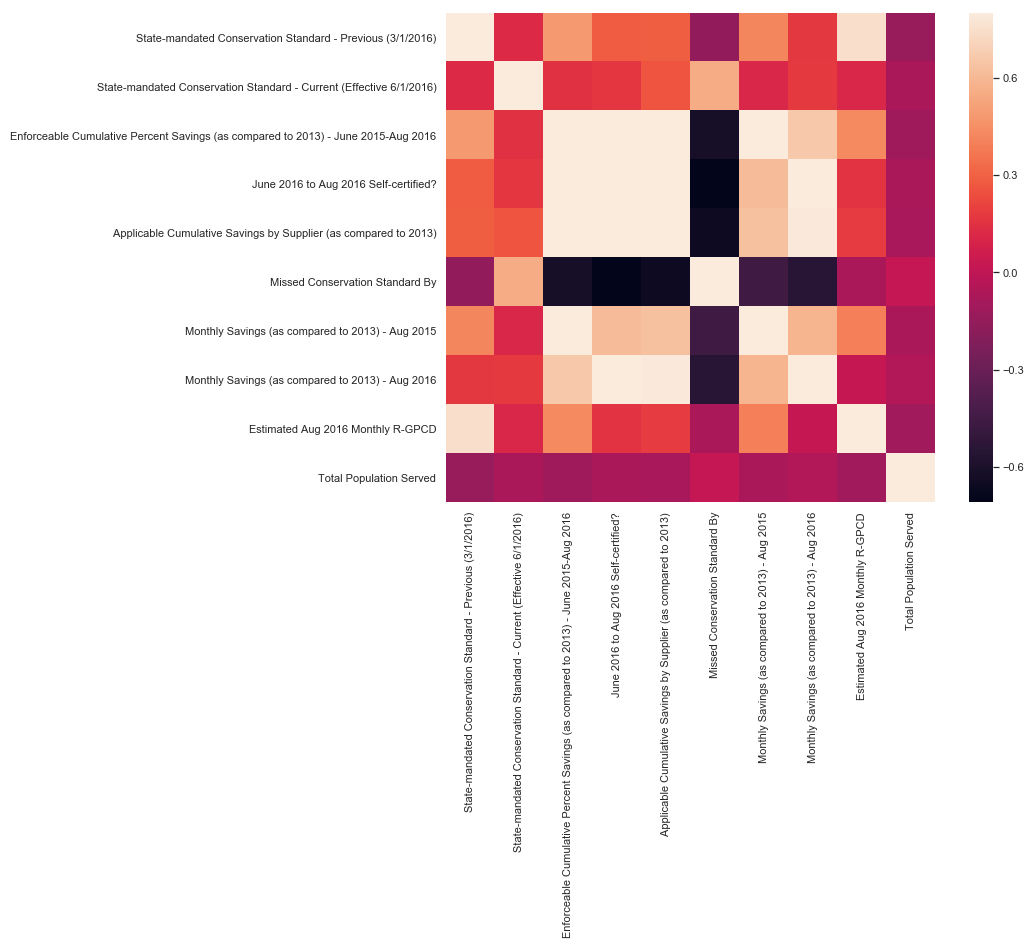

In [448]:
#Thought = Maybe I need to drop the categorical variables, 
#and only keep the continuous ones, for this to display properly.

df = df.corr() 
print(df)

#2. Heat Map
#Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(df, vmax=.8, square=True)


plt.show()

'Supplier Name' 
' Hydrologic Region'
______________________________________________

' Estimated Aug 2016 Monthly R-GPCD'

' Monthly Savings (as compared to 2013) - Aug 2016'

' June 2016 to Aug 2016 Self-certified?'

' Total Population Served'


/Users/katrinajohnson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x216 with 0 Axes>

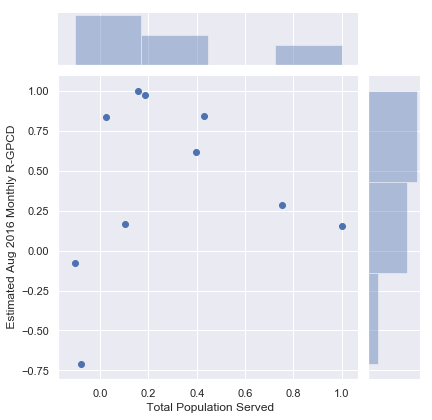

In [475]:
plt.figure(figsize=(15,3)) 

h = sns.jointplot(y=df[' June 2016 to Aug 2016 Self-certified?'], x=df[' Estimated Aug 2016 Monthly R-GPCD']) 
h.set_axis_labels(' June 2016 to Aug 2016 Self-certified?', ' Estimated Aug 2016 Monthly R-GPCD')

